<a href="https://colab.research.google.com/github/Samin8242/Keras_Application/blob/main/sign_langaugeCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syasar","key":"3381472e1e657f0e82a8554d3668d986"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                     Most Streamed Spotify Songs 2023                  47KB  2023-08-26 11:04:57          31275        945  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                 146KB  2023-10-05 06:45:37           4323        107  1.0              
asaniczka/wages-by-education-in-the-usa-1973-2022           Wages by Education in the USA (1973-2022)          7KB  2023-10-09 09:43:40            987         29  1.0              
yakhyojon/air-quality-data                                  Air Quality Data                   

In [4]:
!kaggle datasets download -d muntakimrafi/bengali-sign-language-dataset

 99% 185M/188M [00:02<00:00, 68.0MB/s]
100% 188M/188M [00:02<00:00, 69.6MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('bengali-sign-language-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
train_dir1 = '/content/RESIZED_DATASET'
test_dir = '/content/RESIZED_TESTING_DATA'

In [8]:
train_dir1

'/content/RESIZED_DATASET'

In [9]:
import pathlib
train_dir = pathlib.Path(train_dir1)
train_dir

PosixPath('/content/RESIZED_DATASET')

In [10]:
list(train_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/RESIZED_DATASET/14/20180625_224425.jpg'),
 PosixPath('/content/RESIZED_DATASET/14/20180708_105834.jpg'),
 PosixPath('/content/RESIZED_DATASET/14/IMG_20180716_075001.jpg'),
 PosixPath('/content/RESIZED_DATASET/14/IMG_20180719_141605.jpg'),
 PosixPath('/content/RESIZED_DATASET/14/20180707_003649.jpg')]

In [11]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

8731


In [12]:
oo = list(train_dir.glob('0/*'))
oo[:5]

[PosixPath('/content/RESIZED_DATASET/0/DSC_0311.JPG'),
 PosixPath('/content/RESIZED_DATASET/0/20180713_234254.jpg'),
 PosixPath('/content/RESIZED_DATASET/0/DSC_1330.JPG'),
 PosixPath('/content/RESIZED_DATASET/0/20180626_111512.jpg'),
 PosixPath('/content/RESIZED_DATASET/0/IMG_20180704_100612.jpg')]

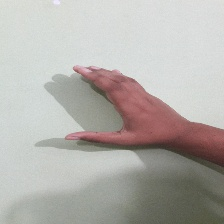

In [13]:
PIL.Image.open(str(oo[1]))

In [14]:
from sklearn.model_selection import train_test_split
train_files, val_files = train_test_split(os.listdir(train_dir), test_size=0.2)

In [38]:

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=256,
    class_mode='categorical',
    shuffle=True
)

# Data preprocessing for validation and test data
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=256,
    class_mode='categorical',
    shuffle=False
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=256,
    class_mode='categorical',
    shuffle=False
)

Found 11061 images belonging to 38 classes.
Found 11061 images belonging to 38 classes.
Found 1520 images belonging to 38 classes.


In [34]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(150,
                                                              150,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [39]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(38, activation='softmax'))


In [40]:
# Model compilation
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [51]:
# Model training
history = model.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator
)

Epoch 1/60
44/44 [==============================] - 71s 2s/step - loss: 0.8231 - accuracy: 0.7370 - val_loss: 0.9180 - val_accuracy: 0.7234
Epoch 2/60
44/44 [==============================] - 71s 2s/step - loss: 0.8409 - accuracy: 0.7378 - val_loss: 0.6108 - val_accuracy: 0.8077
Epoch 3/60
44/44 [==============================] - 70s 2s/step - loss: 0.8035 - accuracy: 0.7445 - val_loss: 0.9480 - val_accuracy: 0.6945
Epoch 4/60
44/44 [==============================] - 71s 2s/step - loss: 0.7954 - accuracy: 0.7437 - val_loss: 0.9693 - val_accuracy: 0.7018
Epoch 5/60
44/44 [==============================] - 71s 2s/step - loss: 0.7739 - accuracy: 0.7586 - val_loss: 0.5075 - val_accuracy: 0.8398
Epoch 6/60
44/44 [==============================] - 71s 2s/step - loss: 0.7375 - accuracy: 0.7601 - val_loss: 0.8211 - val_accuracy: 0.7487
Epoch 7/60
44/44 [==============================] - 71s 2s/step - loss: 0.7402 - accuracy: 0.7676 - val_loss: 0.6669 - val_accuracy: 0.7835
Epoch 8/60
44/44 [==

In [52]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

6/6 [==============================] - 2s 311ms/step - loss: 0.7782 - accuracy: 0.7796
Test accuracy: 77.96%


In [53]:
# Predict on test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

6/6 [==============================] - 2s 299ms/step


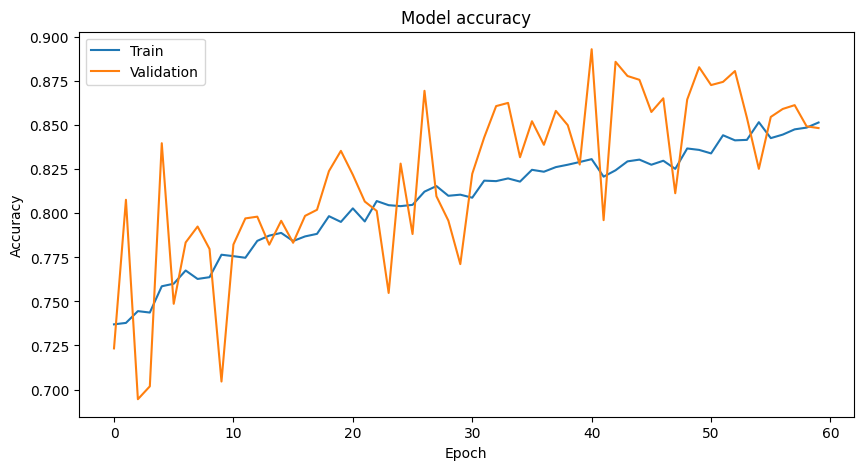

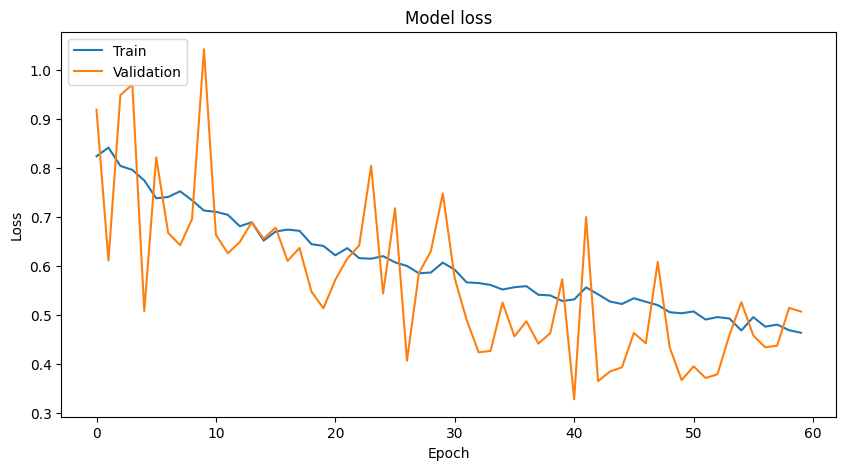

In [54]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [55]:
# Classification Report
classification_rep = classification_report(true_classes, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74        40
           1       0.94      0.85      0.89        40
          10       0.94      0.82      0.88        40
          11       0.83      0.75      0.79        40
          12       0.78      0.70      0.74        40
          13       0.97      0.85      0.91        40
          14       0.89      0.60      0.72        40
          15       0.65      0.80      0.72        40
          16       0.78      0.90      0.84        40
          17       0.78      0.95      0.85        40
          18       0.88      0.70      0.78        40
          19       0.55      0.75      0.63        40
           2       0.80      0.80      0.80        40
          20       0.77      0.75      0.76        40
          21       0.90      0.90      0.90        40
          22       0.57      0.75      0.65        40
          23       0.79      0.47      0.59        40
   

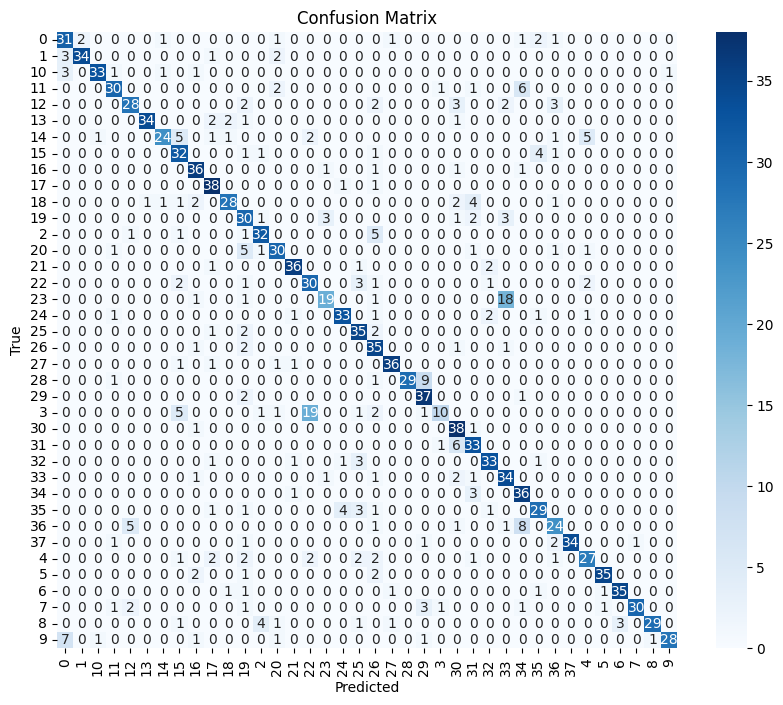

In [56]:
# Confusion Matrix
import seaborn as sns
confusion = confusion_matrix(true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()